## Base de Datos:




* **Country:** país de origen.
* **Description:** breve descripción del vino.
* **Designation**: viñedo de donde proviene el vino.
* **Points**: puntaje dado por el sommelier al vino. (Fueron tomados en consideracion para este analisis los puntajes entre 80 y 100).
* **Price**: precio del vino.
* **Province**: provincia del vino.
* **Region_1**: provincia o estado de donde proviene el vino.
* **Region_2**: región más específica de donde proviene el vino.
* **Taster_name**: nombre del sommelier.
* **Taster_twitter_handle**: cuenta de twitter del sommelier.
* **Title**: Titulo de la reseña del vino.
* **Variety**: Varietal del vino (Ej. Pinot Noir).
* **Winery**: Bodega que elabora el vino.
* **Year**: año de producción.
* **Continent**: Continente al que pertenece el país de origen del vino.
* **Gender**: género del sommelier que realizó el testing del vino.
* **Aprobó**: en base al puntaje que obtuvo el vino se divide en 1 (aprobó>92 puntos) y 2 (desaprobó<92 puntos).
* **Categoría de calidad**: En base al puntaje, se procedió a Clasificar el vino en 3 categorías: A (>=95 puntos), B (90-94,9 puntos), C (<89,9 puntos).


## Importamos las librerias a utilizar y fuente de datos

In [1]:
#!pip install geopandas
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import geopandas as gpd

In [91]:
#Correr esta celda si se importan los datos desde el drive
df_wine = pd.read_excel(r'C:\Users\Luciano\Desktop\python-dashboard-panel-main\dashboard\winemag-data-130k-v3-4°Entrega.xlsx')
df_wine.drop(['indice'],axis=1,inplace=True)
df_map = gpd.read_file(r'C:\Users\Luciano\Desktop\python-dashboard-panel-main\dashboard\World_Countries.shp')

# Data wrangling

In [93]:
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,continent,gender,aprobo,categoria_calidad
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,39,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,Europe,M,2,C
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,Europe,M,2,C
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,North America,M,2,C
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,North America,M,2,C
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,North America,M,2,C


In [94]:
df_wine.shape

(129971, 18)

In [95]:
df_wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'year', 'continent', 'gender', 'aprobo',
       'categoria_calidad'],
      dtype='object')

In [96]:
df_wine.dtypes

country                  object
description              object
designation              object
points                    int64
price                     int64
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
year                      int64
continent                object
gender                   object
aprobo                    int64
categoria_calidad        object
dtype: object

# EDA

In [97]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   country                129971 non-null  object
 1   description            129971 non-null  object
 2   designation            92505 non-null   object
 3   points                 129971 non-null  int64 
 4   price                  129971 non-null  int64 
 5   province               129905 non-null  object
 6   region_1               108722 non-null  object
 7   region_2               50510 non-null   object
 8   taster_name            129971 non-null  object
 9   taster_twitter_handle  121708 non-null  object
 10  title                  129968 non-null  object
 11  variety                129967 non-null  object
 12  winery                 129968 non-null  object
 13  year                   129971 non-null  int64 
 14  continent              129971 non-null  object
 15  

In [98]:
df_wine.count()

country                  129971
description              129971
designation               92505
points                   129971
price                    129971
province                 129905
region_1                 108722
region_2                  50510
taster_name              129971
taster_twitter_handle    121708
title                    129968
variety                  129967
winery                   129968
year                     129971
continent                129971
gender                   129971
aprobo                   129971
categoria_calidad        129971
dtype: int64

In [99]:
df_wine.describe().round(2)

,points,price,year,aprobo
count,129971.00,129971.00,129971.00,129971.0
mean,88.45,33.29,2010.64,1.9
std,3.04,24.28,4.03,0.3
min,80.00,4.00,1821.00,1.0
25%,86.00,22.00,2009.00,2.0
50%,88.00,31.00,2011.00,2.0
75%,91.00,42.00,2013.00,2.0
max,100.00,2500.00,2017.00,2.0


In [100]:
df_wine.isna().sum()

country                      0
description                  0
designation              37466
points                       0
price                        0
province                    66
region_1                 21249
region_2                 79461
taster_name                  0
taster_twitter_handle     8263
title                        3
variety                      4
winery                       3
year                         0
continent                    0
gender                       0
aprobo                       0
categoria_calidad            0
dtype: int64

In [101]:
correlation = df_wine.corr(method="pearson")
correlation.head()

,points,price,year,aprobo
points,1.000000,0.201036,0.048479,-0.577684
price,0.201036,1.000000,-0.031593,-0.176575
year,0.048479,-0.031593,1.000000,0.016981
aprobo,-0.577684,-0.176575,0.016981,1.000000


### **Análisis Univariado**

C:\Users\Luciano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


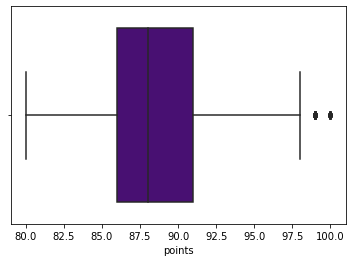

In [102]:
from seaborn import boxplot
boxplot(df_wine.points, color = "indigo")
plt.show()
#en este boxplot observamos que el puntaje se concentra en un rango entre 86 y 91
#mediana en aprox 88

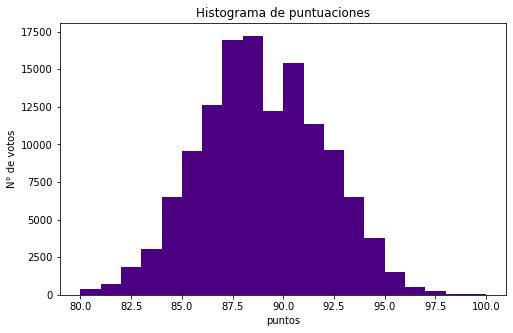

In [103]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['points'], bins=20, color = "indigo")
ax.set_title('Histograma de puntuaciones')
ax.set_xlabel('puntos')
ax.set_ylabel('N° de votos')
plt.show()
#este histograma nos confirma lo mostrado en el boxplot

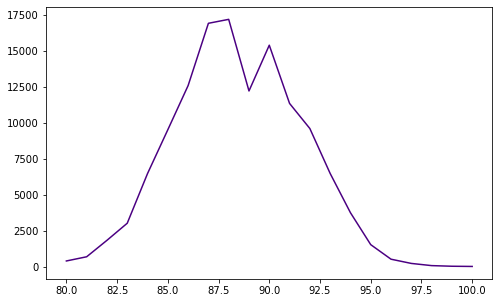

In [104]:
fig, ax = plt.subplots(figsize=(8, 5))
df_wine['points'].value_counts().sort_index().plot.line(color = "indigo")
plt.show()
#otra forma de ver la distribución de los datos

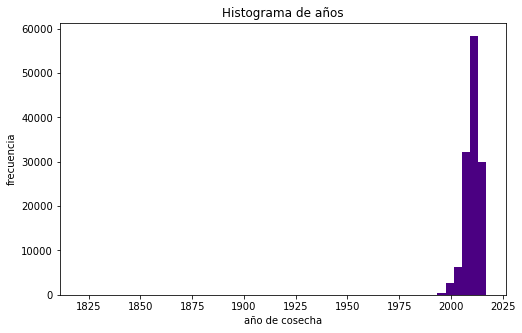

In [105]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['year'], bins=50, color = "indigo")
ax.set_title('Histograma de años')
ax.set_xlabel('año de cosecha')
ax.set_ylabel('frecuencia')
plt.show()
#este histograma nos muestra que la gran mayoria de los años de cosecha es posterior al año 2000

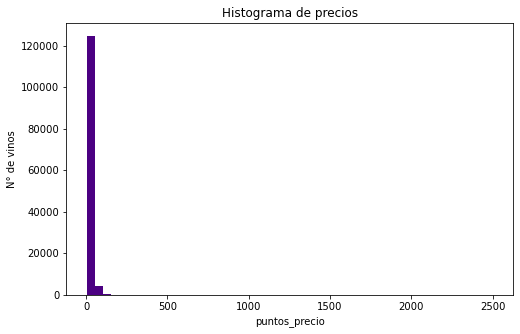

In [106]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['price'], bins=50, color = "indigo")
ax.set_title('Histograma de precios')
ax.set_xlabel('puntos_precio')
ax.set_ylabel('N° de vinos')
plt.show()
#vemos que la gran mayoria de los precios tienen un puntaje de vino bajo

C:\Users\Luciano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


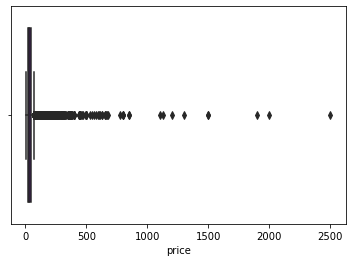

In [107]:
from seaborn import boxplot
boxplot(df_wine.price, color = "indigo")
plt.show()
#en este boxplot observamos que el precio tiene una variabilidad muy grande
#el grueso de los precios son bajos, pero hay algunos pocos que superan los 500 dolares. 

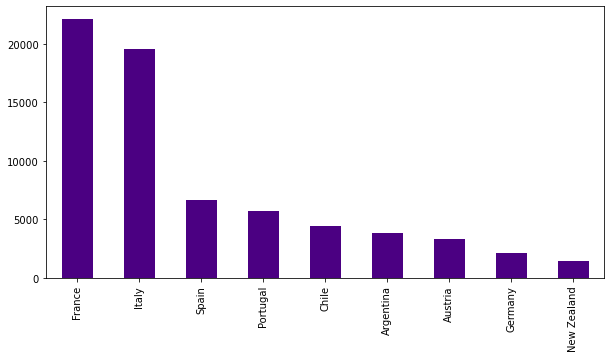

In [108]:
df_wine_primeros_10_pais = df_wine[df_wine.country.isin (['United States','France','Italy','Spain','Portugal','Chile','Argentina','Austria','Germany','New Zealand'])]
fig, ax = plt.subplots(figsize=(10, 5))
df_wine_primeros_10_pais['country'].value_counts().plot.bar(color = "indigo")
plt.show()
# aqui observamos el país de origen de los vinos que tienen mas reviews

### **Análisis Bivariado**

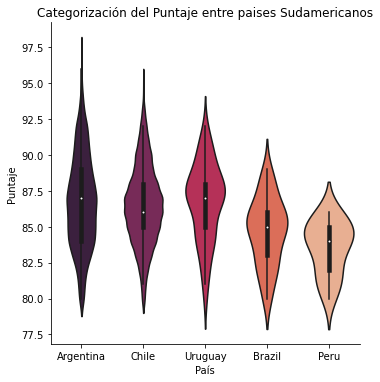

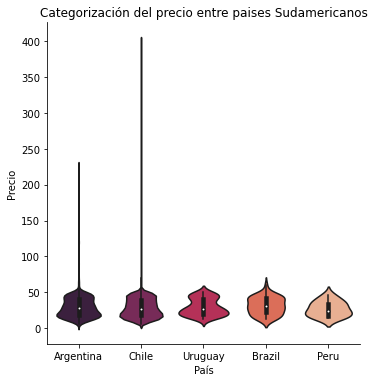

In [109]:
#filtramos los paises de sudamerica
df_pais = df_wine[df_wine.country.isin (['Argentina','Chile','Peru','Brazil','Uruguay'])]
df_pais
#comparamos los puntajes con un grafico de violin
ax = sns.catplot(data=df_pais, kind='violin', x='country', y='points', split=True, palette='rocket')
ax.set(xlabel='País', ylabel='Puntaje', title='Categorización del Puntaje entre paises Sudamericanos')
plt.show()
#comparamos los precios con otro grafico de violin
#es destacable que los precios en Argentina, Chile y Uruguay tienen un comportamiento bimodal
ax = sns.catplot(data=df_pais, kind='violin', x='country', y='price', split=True, palette='rocket')
ax.set(xlabel='País', ylabel='Precio', title='Categorización del precio entre paises Sudamericanos')
plt.show()

<AxesSubplot:xlabel='price', ylabel='points'>

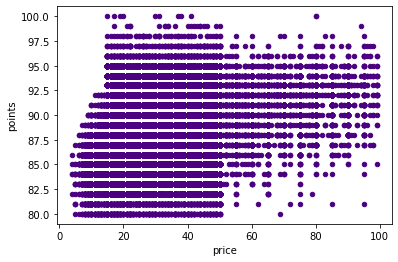

In [110]:
df_wine[df_wine['price'] < 100].plot.scatter(x='price', y='points', color='indigo')
#hacemos scatter plot con las variables de puntos y precio (menor a 100 dólares)
#la elevada cantidad de puntos no nos permite distinguir ningun rasgo

<AxesSubplot:xlabel='price', ylabel='points'>

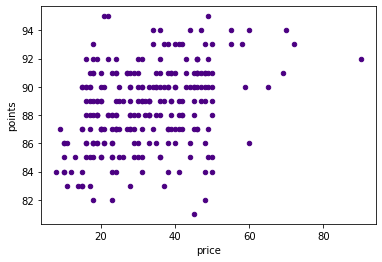

In [111]:
df_wine[df_wine['price'] < 100].sample(250).plot.scatter(x='price', y='points', color='indigo')
#haciendo el mismo grafico pero con una muestra de 250 datos, se observa que en el extremo 
#inferior izquierdo hay mayor densidad de datos, tambien se ve una leve correlación directa

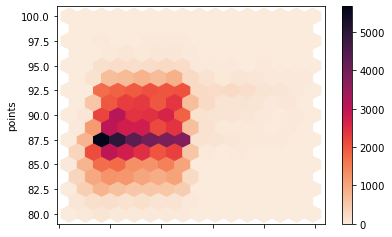

In [112]:
df_wine[df_wine['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15, cmap='rocket_r')
plt.show()
#con este grafico el cual muestra la densidad de puntos, podemos concluir que
#la gran mayoria de los vinos tiene puntaje cercanos a 87.5 y un precio que ronda los 20 a 40 dolares. 

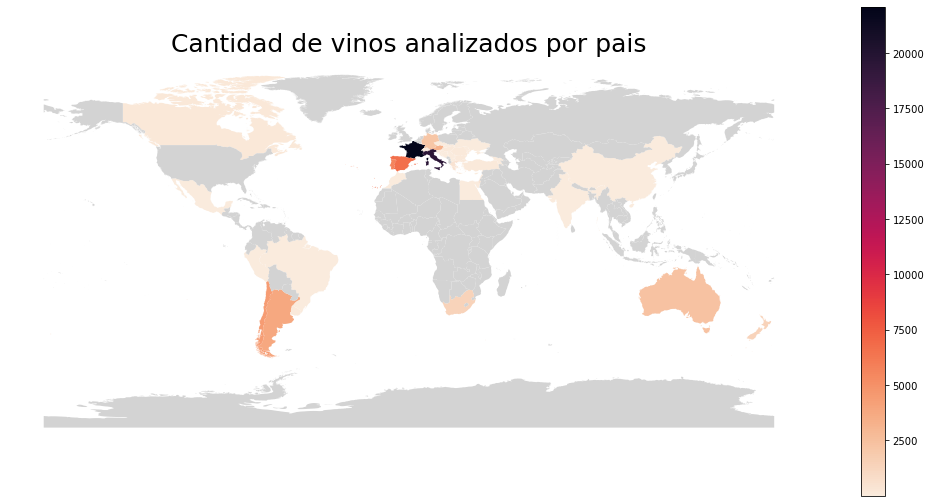

In [113]:
frec= pd.DataFrame(df_wine['country'].value_counts())
df_map_wine = df_map.merge(frec, how='left', left_on='COUNTRY',right_index=True)
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)
ax.set_title('Cantidad de vinos analizados por pais', size=25)
df_map_wine.plot(column='country',
           ax=ax,
           legend=True,
           cmap='rocket_r',
           missing_kwds={"color": "lightgrey"},);
ax.set_axis_off();
#generamos un mapa en donde vemos el origen de los vinos que tienen reviews

### **Análisis Multivariado**


<AxesSubplot:xlabel='points', ylabel='taster_name'>

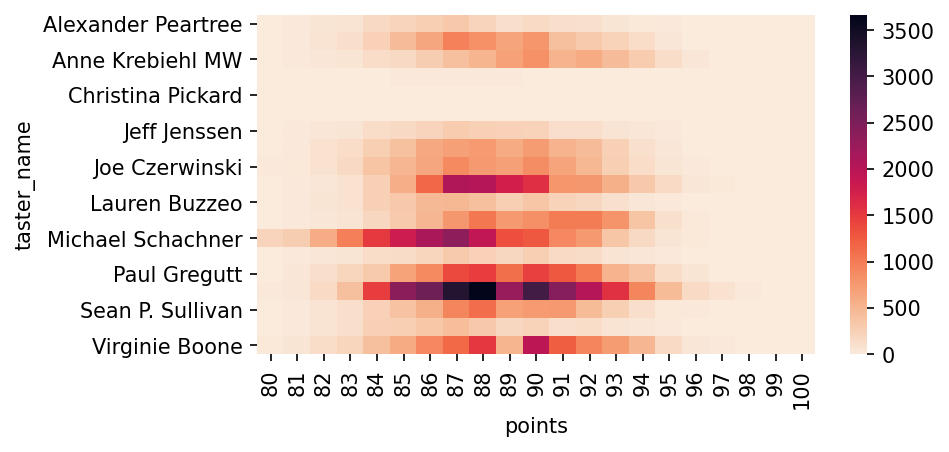

In [114]:
plt.figure(figsize=(6,3), dpi=150)
result = pd.crosstab(df_wine.taster_name, df_wine.points)
sns.heatmap(result,cmap = 'rocket_r' )
#en este crosstab podemos observar los nombres de los catadores, el puntaje que otorgaron
#y que tan frecuentemente otorgan ese puntaje

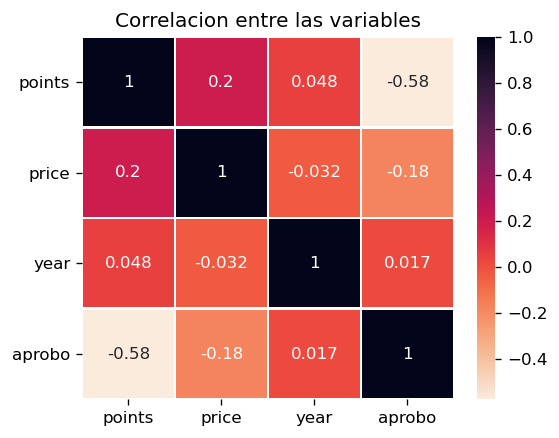

In [115]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_wine.corr(),dtype = bool))
sns.heatmap(df_wine.corr(), annot=True, lw = 1, cmap = 'rocket_r')
plt.yticks(rotation = 0)
plt.title('Correlacion entre las variables')
plt.show()
#se observa que la correlación entre las variables es muy baja

C:\Users\Luciano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


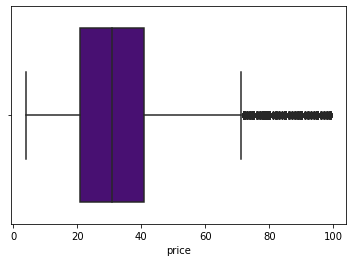

In [176]:
df_wine_100usd_hm = df_wine[df_wine['price'] < 100] #esta variable será usada para el heatmap
df_wine_100usd = df_wine[df_wine['price'] < 100] #esta vatiable será usada para los algoritmos
#aqui filtramos los autliers de precio, de esa manera, sin perder una cantidad de datos importante
#podemos analizar mejor el dataset
from seaborn import boxplot
boxplot(df_wine_100usd.price, color = "indigo")
plt.show()

Basandonos en este boxplot, podemos afirmar que la gran mayoría de los vinos tiene un valor menor a los 100 dólares, incluso, la caja se encuentra entre 20 y 40 dólares. 

In [177]:
df_wine_100usd_Arg = df_wine_100usd.loc[df_wine_100usd.country == 'Argentina', :]
df_wine_100usd_Arg.drop('region_2',axis=1,inplace=True)

C:\Users\Luciano\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


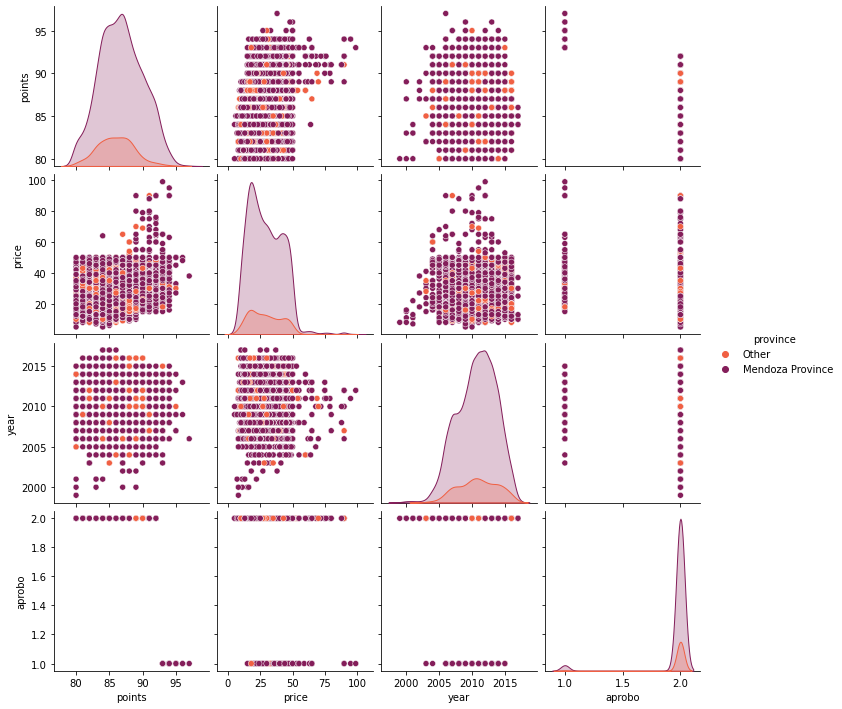

In [129]:
sns.pairplot(df_wine_100usd_Arg, hue='province', palette= 'rocket_r')

In [130]:
# transformamos todo en variables categóricas para poder entrenar de mejor manera el modelo
for n in df_wine_100usd_hm.columns:
  if str(df_wine_100usd_hm[n].dtype) == 'object' or str(df_wine_100usd_hm[n].dtype) == 'category':
    df_wine_100usd_hm[n] = df_wine_100usd_hm[n].astype('category').cat.codes
df_wine_100usd_hm.head()

<ipython-input-130-17e71d7db8fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_100usd_hm[n] = df_wine_100usd_hm[n].astype('category').cat.codes


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,continent,gender,aprobo,categoria_calidad
0,22,16239,36529,87,39,331,423,-1,9,4,78794,688,11588,2013,2,1,2,2
1,31,99092,2305,87,15,108,-1,-1,15,10,88539,449,12933,2011,2,1,2,2
2,40,74779,-1,87,14,268,1216,16,14,7,88952,435,12995,2013,3,1,2,2
3,40,59933,27750,87,13,218,548,-1,0,-1,99963,477,14365,2013,3,1,2,2
4,40,55174,36190,87,65,268,1216,16,14,7,101876,439,14596,2012,3,1,2,2


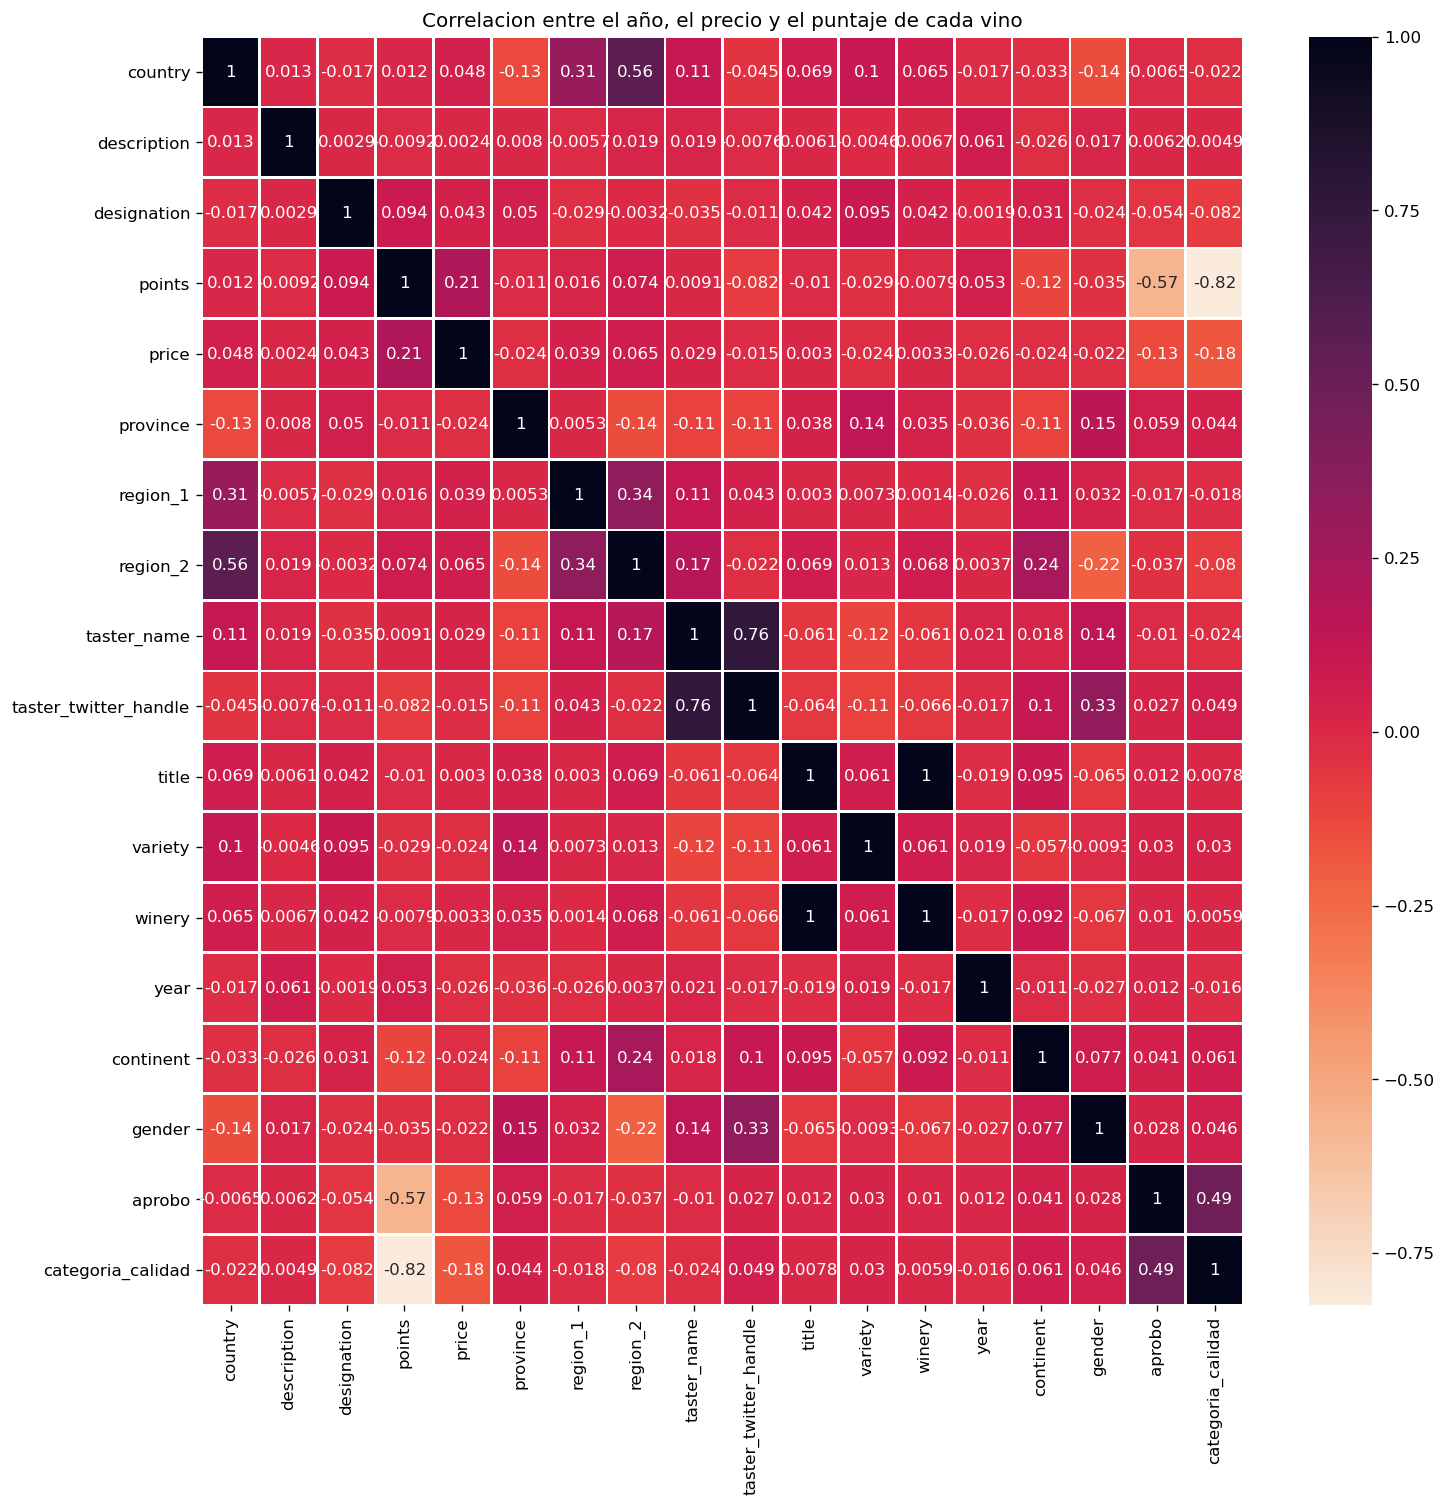

In [132]:
#luego de modificar el dataset volvemos a evaluar la correlación entre las variables
#Correlaciones
plt.figure(dpi = 120,figsize= (14,14))
mask = np.triu(np.ones_like(df_wine_100usd.corr(),dtype = bool))
sns.heatmap(df_wine_100usd_hm.corr(), annot=True, lw = 1, cmap = 'rocket_r')
plt.yticks(rotation = 0)
plt.title('Correlacion entre el año, el precio y el puntaje de cada vino')
plt.show()
#se observa que la correlación entre las variables es muy baja

# Algoritmos de clasificación

En base a los análisis de variables realizados previamente, 
quitamos del dataset las columnas irrelevantes que no aportan información al modelo.
Las columnas que eliminamos son: indice, region_1, region_2, taster_name, taster_twitter_handle, description, title, gender, province

In [178]:
df_wine_100usd.drop(['region_1', 'aprobo', 'taster_name', 'description', 'title', 'gender', 'designation','province','continent','taster_twitter_handle','region_2'], axis=1, inplace=True)

In [179]:
mask = df_wine_100usd['winery'].value_counts().head(5000)
NewDf = df_wine_100usd[df_wine_100usd['winery'].isin(mask.index[mask<5000])]
df_wine_100usd = pd.get_dummies(NewDf, columns=['country','variety','winery'])
df_wine_100usd.head()

,points,price,year,categoria_calidad,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,winery_Zudugarai,winery_Zull,winery_Zusslin,winery_a-non-ah-mus,winery_flipflop,winery_kukkula,winery_oops,winery_Ànima Negra,winery_Écluse,winery_àMaurice
0,87,39,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15,2011,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65,2012,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision tree

In [180]:
#Obtenemos las columnas que usaremos para armar el modelo
df_DeTree = df_wine_100usd 
df_DeTree.head()

,points,price,year,categoria_calidad,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,winery_Zudugarai,winery_Zull,winery_Zusslin,winery_a-non-ah-mus,winery_flipflop,winery_kukkula,winery_oops,winery_Ànima Negra,winery_Écluse,winery_àMaurice
0,87,39,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15,2011,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65,2012,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
#categorias de la variable target 
print(df_DeTree['categoria_calidad'].unique())

['C' 'B' 'A']


In [182]:
#Definimos Xd e Yd, le ponemos la 'd' para referenciar que son de Decision Tree 
Xd = df_DeTree.drop(['categoria_calidad' , 'points'], axis=1) 
#Se elimina el valor a predecir "categoria_calidad" 
#tambien se elimina 'points' ya que esta muy relacionada a la varable 'categoría_de_calidad'
Yd = df_DeTree.categoria_calidad
#Paso a definirlo como Target

In [242]:
#Importo las librerias para diferenciar train y test
from sklearn.model_selection import train_test_split 
#Defino el porcentaje para cada uno Train: 70, Test:30
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.30, random_state=47) 
Yd_test

88403     C
97029     C
41389     B
33875     C
106356    B
         ..
4932      C
70610     C
26236     B
75079     C
75925     B
Name: categoria_calidad, Length: 29679, dtype: object

In [184]:
from sklearn.tree import DecisionTreeClassifier 
#Creamos el modelo
model_DeTree = DecisionTreeClassifier(max_depth=20, random_state = 47) 

In [185]:
#Entrenamos el modelo
model_DeTree.fit(Xd_train,Yd_train)

DecisionTreeClassifier(max_depth=20, random_state=47)

In [186]:
#Prediccion en Train
Yd_train_pred = model_DeTree.predict(Xd_train) 
#Prediccion en Test
Yd_test_pred = model_DeTree.predict(Xd_test) 

In [187]:
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yd_train, Yd_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.69918
% de aciertos en set de evaluación: 0.65592


In [188]:
#evaluamos la importancia de cada variable en el algoritmo
importancia_predictores_DeTree = pd.DataFrame(
                            {'predictor': df_DeTree.drop(columns = ["categoria_calidad", "points"]).columns,
                             'importancia': model_DeTree.feature_importances_}
                            )
print("Importancia de los predictores ")
print("en el modelo Decision Tree") 
print("-------------------------------------------")
importancia_predictores_DeTree.sort_values('importancia', ascending=False)

Importancia de los predictores 
en el modelo Decision Tree
-------------------------------------------


,predictor,importancia
0,price,0.270666
1,year,0.117176
8,country_Chile,0.038694
415,variety_Pinot Noir,0.029052
4,country_Austria,0.028900
...,...,...
2258,winery_Domaine Méo-Camuzet,0.000000
2257,winery_Domaine Moltès,0.000000
2256,winery_Domaine Michel Fonne,0.000000
2255,winery_Domaine Mersiol,0.000000


Se observa que las variables mas relevantes que toma el algoritmo a la hora de predecir la categoria_de_calidad son: winery, price, year y variety

In [189]:
from sklearn.metrics import classification_report
print(classification_report(Yd_test, Yd_test_pred))

              precision    recall  f1-score   support

           A       0.29      0.04      0.07       584
           B       0.60      0.41      0.49     11480
           C       0.68      0.84      0.75     17615

    accuracy                           0.66     29679
   macro avg       0.52      0.43      0.43     29679
weighted avg       0.64      0.66      0.63     29679



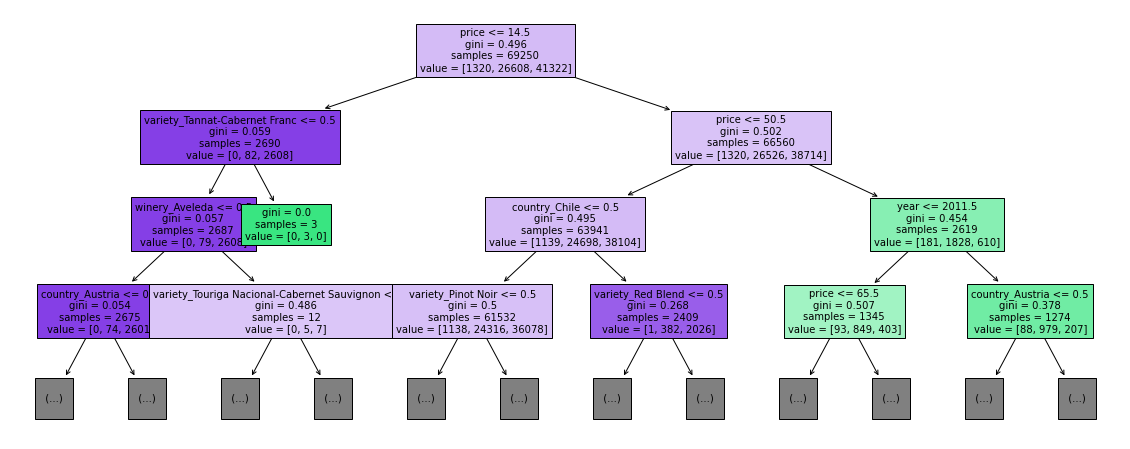

In [190]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(decision_tree=model_DeTree, feature_names=Xd.columns, filled=True, fontsize=10, max_depth=3);

In [191]:
#Optimizacion de hiperparametros
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(1, 30),
'criterion' : ['gini' , 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(Xd_train, Yd_train)
print("Mejores parametros:") 
grid_search.best_params_

Mejores parametros:


{'criterion': 'gini', 'max_depth': 29}

In [192]:
#Importamos el modelo
from sklearn.tree import DecisionTreeClassifier 
#creamos el modelo optimizado
model_DeTree_opt = DecisionTreeClassifier(max_depth=29, criterion = 'gini', random_state = 47) #Creamos el modelo
model_DeTree_opt.fit(Xd_train,Yd_train)
#Prediccion en Train
Yd_train_pred = model_DeTree_opt.predict(Xd_train) 
#Prediccion en Test
Yd_test_pred = model_DeTree_opt.predict(Xd_test) 
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yd_train, Yd_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.75193
% de aciertos en set de evaluación: 0.66026


<Figure size 2400x2400 with 0 Axes>

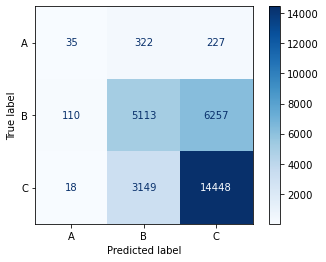

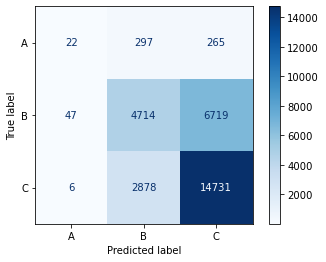

In [193]:
#comparación de matrices de confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#Ploteamos la Matriz
plt.figure(dpi = 120,figsize= (20,20))
#matriz del modelo optimizado
plot_confusion_matrix(model_DeTree_opt, Xd_test, Yd_test,cmap=plt.cm.Blues)
#matriz del modelo sin optimizar
plot_confusion_matrix(model_DeTree, Xd_test, Yd_test,cmap=plt.cm.Blues)
plt.show()

In [241]:
#evaluamos el error del modelo
from sklearn.metrics import mean_squared_error

def evaluar_modelo(model_DeTree, Xd_train, Xd_test, Yd_train, Yd_test):
       
    Yd_train_pred = model_DeTree.predict(Xd_train)
    Yd_test_pred = model_DeTree.predict(Xd_test)
    Yd_train_pred = scaler_y.inverse_transform(Yd_train_pred)
    Yd_test_pred = scaler_y.inverse_transform(Yd_test_pred)
    Yd_train = scaler_y.inverse_transform(Yd_train)
    Yd_test = scaler_y.inverse_transform(Yd_test)
    Yd_train_pred = Yd_train_pred.reshape((len(Yd_train_pred),1))
    Yd_test_pred = Yd_test_pred.reshape((len(Yd_test_pred),1))

array(['B', 'B', 'C', ..., 'C', 'C', 'B'], dtype=object)

In [237]:
# calculo del error
rmse_train_DeTree = np.sqrt(mean_squared_error(Yd_train, Yd_train_pred))
rmse_test_DeTree = np.sqrt(mean_squared_error(Yd_test, Yd_test_pred))

print(f'Raíz del error cuadrático medio en Train del algoritmo Decision Tree: {rmse_train_DeTree}')
print(f'Raíz del error cuadrático medio en Test del algoritmo Decision Tree: {rmse_test_DeTree}\n')
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(Yd_train - Yd_train_pred, bins = 20, label = 'train')
sns.distplot(Yd_test - Yd_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'C'

## Random Forest

In [243]:
#importamos las librerías.
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [244]:
df_RaFo = df_wine_100usd
df_RaFo.head()

,points,price,year,categoria_calidad,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,winery_Zudugarai,winery_Zull,winery_Zusslin,winery_a-non-ah-mus,winery_flipflop,winery_kukkula,winery_oops,winery_Ànima Negra,winery_Écluse,winery_àMaurice
0,87,39,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15,2011,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65,2012,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
#Separamos en X e Y, le ponemos la 'r' para referenciar a Random forest
Xr = df_RaFo.drop(["categoria_calidad", 'points'], axis=1)
Yr = df_RaFo["categoria_calidad"]

In [246]:
#Separamos en train y test
(Xr_train, Xr_test, Yr_train, Yr_test) = train_test_split(Xr,Yr, stratify=Yr,test_size=0.30,random_state=11)

In [247]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier
#creamos el modelo
model_RaFo = RandomForestClassifier(n_estimators = 20 , max_depth = 5)
model_RaFo.fit(Xr_train, Yr_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [248]:
#Prediccion en Test
Yr_test_pred = model_RaFo.predict(Xr_test) 
#Prediccion en Train
Yr_train_pred = model_RaFo.predict(Xr_train)

In [249]:
from sklearn.metrics import accuracy_score
#Se calcula el accuracy en Test
#Calculamos el accuracy en Train
train_accuracy = accuracy_score(Yr_train, Yr_train_pred)
#Calamos el accuracy en Test
test_accuracy = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos sobre el set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.59577
% de aciertos sobre el set de evaluación: 0.59574


In [251]:
# Generamos algunos valores de hiperparametros
#(hicimos pocos hiperparámetros por temas de capacidad de procesamiento)
n_estimators = np.arange(2,10,2)
max_depth = np.arange(2,10,2)
criterion = ('gini', 'entropy')

In [252]:
# Creoamos el param grid con los hiperparámetros generados previamente
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion': criterion}
print(param_grid)

{'n_estimators': array([2, 4, 6, 8]), 'max_depth': array([2, 4, 6, 8]), 'criterion': ('gini', 'entropy')}


In [253]:
#importamos GridSearchCV
from sklearn.model_selection import GridSearchCV
RaFo_Grid = GridSearchCV(estimator = model_RaFo, param_grid = param_grid)

In [254]:
#Entrenamos el modelo
RaFo_Grid.fit(Xr_train, Yr_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5, n_estimators=20),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([2, 4, 6, 8])})

In [255]:
#vemos cuales son los mejores parámetros
RaFo_Grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 4}

In [257]:
#creamos el modelo optimizado
model_RaFo_opt = RandomForestClassifier(n_estimators = 4 , max_depth = 8 , criterion = 'gini')
model_RaFo_opt.fit(Xr_train, Yr_train)
Yr_train_pred = model_RaFo_opt.predict(Xr_train) #Prediccion en Train
Yr_test_pred = model_RaFo_opt.predict(Xr_test) #Prediccion en Test
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yr_train, Yr_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.60172
% de aciertos en set de evaluación: 0.60053


In [258]:
#evaluamos la importancia de cada variable en el algoritmo
importancia_predictores_RaFo = pd.DataFrame(
                            {'predictor': df_RaFo.drop(columns = ["categoria_calidad", "points"]).columns,
                             'importancia': model_RaFo.feature_importances_})
print("Importancia de los predictores")
print(" en el modelo de Random Forest")
print("-------------------------------------------")
importancia_predictores_RaFo.sort_values('importancia', ascending=False)

Importancia de los predictores
 en el modelo de Random Forest
-------------------------------------------


,predictor,importancia
8,country_Chile,0.078027
415,variety_Pinot Noir,0.076703
4,country_Austria,0.062267
366,variety_Nebbiolo,0.047481
1,year,0.045970
...,...,...
1916,winery_Cleto Chiarli,0.000000
1915,winery_Clendenen,0.000000
1914,winery_Clearwater Canyon,0.000000
1913,winery_Clayhouse,0.000000


In [259]:
from sklearn.metrics import classification_report
print(classification_report(Yr_test, Yr_test_pred))

C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       571
           B       0.80      0.02      0.03     11427
           C       0.60      1.00      0.75     17681

    accuracy                           0.60     29679
   macro avg       0.47      0.34      0.26     29679
weighted avg       0.67      0.60      0.46     29679



<Figure size 1800x1800 with 0 Axes>

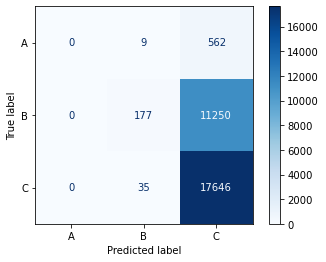

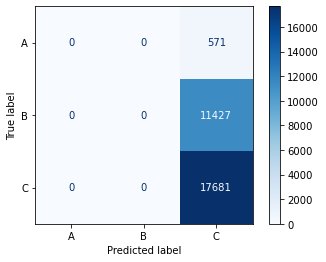

In [260]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#Ploteamos la Matriz
plt.figure(dpi = 120,figsize= (15,15))
#Ploteamos la Matriz del modelo optimizado
plot_confusion_matrix(model_RaFo_opt, Xr_test, Yr_test,cmap=plt.cm.Blues)
#Ploteamos la Matriz del modelo sin optimizar
plot_confusion_matrix(model_RaFo, Xr_test, Yr_test,cmap=plt.cm.Blues)
plt.show()

In [65]:
#evaluamos el error del modelo
from sklearn.metrics import mean_squared_error
def evaluar_modelo(model_RaFo, Xr_train, Xr_test, Yr_train, Yr_test):
       
    Yr_train_pred = model_RaFo.predict(Xr_train)
    Yr_test_pred = model_RaFo.predict(Xr_test)
    Yr_train_pred = scaler_y.inverse_transform(Yr_train_pred)
    Yr_test_pred = scaler_y.inverse_transform(Yr_test_pred)
    Yr_train = scaler_y.inverse_transform(Yr_train)
    Yr_test = scaler_y.inverse_transform(Yr_test)
    Yr_train_pred = Yr_train_pred.reshape((len(Yr_train_pred),1))
    Yr_test_pred = Yr_test_pred.reshape((len(Yr_test_pred),1))

Raíz del error cuadrático medio en Train del algoritmo Random Forest: 0.6197691068114193
Raíz del error cuadrático medio en Test del algoritmo Random Forest: 0.6195747636207894



C:\Users\Luciano\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luciano\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


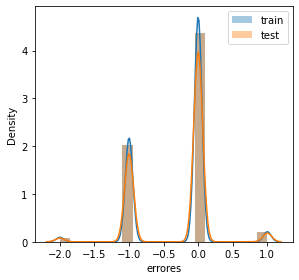

In [66]:
 #Hacemos el calculo del error
rmse_train_RaFo = np.sqrt(mean_squared_error(Yr_train, Yr_train_pred))
rmse_test_RaFo = np.sqrt(mean_squared_error(Yr_test, Yr_test_pred))
  
print(f'Raíz del error cuadrático medio en Train del algoritmo Random Forest: {rmse_train_RaFo}')
print(f'Raíz del error cuadrático medio en Test del algoritmo Random Forest: {rmse_test_RaFo}\n')
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(Yr_train - Yr_train_pred, bins = 20, label = 'train')
sns.distplot(Yr_test - Yr_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.tight_layout()
plt.show()

## KNN


In [261]:
#genero el DF para poder validar los datos.
df_wine_KNN = df_wine_100usd
df_wine_KNN.head()

,points,price,year,categoria_calidad,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,winery_Zudugarai,winery_Zull,winery_Zusslin,winery_a-non-ah-mus,winery_flipflop,winery_kukkula,winery_oops,winery_Ànima Negra,winery_Écluse,winery_àMaurice
0,87,39,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15,2011,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13,2013,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65,2012,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
#Separamos en X e Y, le ponemos la 'k' para referenciar a KNN
Xk = df_wine_KNN.drop(["categoria_calidad", 'points'], axis=1)
Yk = df_wine_KNN[['categoria_calidad']]

In [263]:
#Importo las librerias para diferenciar train y test
from sklearn.model_selection import train_test_split 
#Defino el porcentaje para cada uno Train: 70, Test:30
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(Xk, Yk, test_size=0.30, random_state=47) 

In [264]:
#Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier
#Creamos el modelo
model_KNN = KNeighborsClassifier (n_neighbors= 5, weights = 'uniform', leaf_size= 10)

In [265]:
#Entrenamos el modelo
model_KNN.fit(Xk_train, Yk_train)

<ipython-input-265-23f7abb3c480>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN.fit(Xk_train, Yk_train)


KNeighborsClassifier(leaf_size=10)

In [266]:
#Prediccion en Train
Yk_train_pred = model_KNN.predict(Xk_train) 
#Prediccion en Test
Yk_test_pred = model_KNN.predict(Xk_test) 

In [267]:
from sklearn.metrics import accuracy_score
#Se calcula el accuracy en Test
test_accuracy = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.60172
% de aciertos en set de evaluación: 0.61306


In [268]:
from sklearn.metrics import classification_report
print(classification_report(Yk_test, Yk_test_pred))

              precision    recall  f1-score   support

           A       0.12      0.04      0.06       584
           B       0.51      0.49      0.50     11480
           C       0.68      0.71      0.69     17615

    accuracy                           0.61     29679
   macro avg       0.44      0.41      0.42     29679
weighted avg       0.60      0.61      0.61     29679



In [269]:
#Generamos algunos valores de hiperparametros
#(también hicimos pocos hiperparámetros por temas de capacidad de procesamiento)
param_grid = {
    'n_neighbors' : [3,5],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']}
print(param_grid)

{'n_neighbors': [3, 5], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [270]:
# Creamos el param grid con los hiperparámetros generados previamente
KNN_Grid = GridSearchCV ( 
    KNeighborsClassifier (),
    param_grid,
    verbose = 1,
    cv = 3)

In [271]:
#importamos el GridSearch
from sklearn.model_selection import GridSearchCV
RaFo_Grid = GridSearchCV(estimator = model_KNN, param_grid = param_grid)

In [272]:
#Entrenamos el modelo
KNN_Grid.fit (Xk_train, Yk_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-pack

C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [273]:
#vemos cuales son los mejores parámetros
KNN_Grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [281]:
#corremos el modelo con los parametros optimizados 
model_KNN_opt = KNeighborsClassifier (n_neighbors= 2, weights = 'distance', metric= 'manhattan', leaf_size= 5)

In [282]:
model_KNN_opt.fit(Xk_train, Yk_train)
Yk_test_pred = model_KNN_opt.predict(Xk_test) 
from sklearn.metrics import accuracy_score
#Hacemos el accuracy en Test
test_accuracy = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy.round(5))
print('% de aciertos en set de evaluación optimizado:',test_accuracy.round(5))

<ipython-input-282-653e51e4bdbb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN_opt.fit(Xk_train, Yk_train)


MemoryError: Unable to allocate 2.91 GiB for an array with shape (69250, 5637) and data type float64

In [285]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#print(confusion_matrix(Yk_test, Yk_test_pred))
plt.figure(dpi = 120,figsize= (5,5))
#Ploteamos la Matriz del modelo optimizado
#plot_confusion_matrix(model_KNN_opt, Xk_test, Yk_test,cmap=plt.cm.Blues)
#Ploteamos la Matriz del modelo sin optimizar
plot_confusion_matrix(model_KNN, Xk_test, Yk_test,cmap=plt.cm.Blues)
plt.show()

MemoryError: Unable to allocate 1.25 GiB for an array with shape (5637, 29679) and data type int64

<Figure size 600x600 with 0 Axes>

In [83]:
#evaluamos el error del modelo
def evaluar_modelo(model_KNN, Xk_train, Xk_test, Yk_train, Yk_test):
       
    Yk_train_pred = model_KNN.predict(Xk_train)
    Yk_test_pred = model_KNN.predict(Xk_test)
    Yk_train_pred = scaler_y.inverse_transform(Yk_train_pred)
    Yk_test_pred = scaler_y.inverse_transform(Yk_test_pred)
    Yk_train = scaler_y.inverse_transform(Yk_train)
    Yk_test = scaler_y.inverse_transform(Yk_test)
    Yk_train_pred = Yk_train_pred.reshape((len(Yk_train_pred),1))
    Yk_test_pred = Yk_test_pred.reshape((len(Yk_test_pred),1))

In [84]:
#Hacemos el calculo del error
rmse_train_knn = np.sqrt(mean_squared_error(Yk_train, Yk_train_pred))
rmse_test_knn = np.sqrt(mean_squared_error(Yk_test, Yk_test_pred))
print(f'Raíz del error cuadrático medio en Train del algoritmo KNN: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test del algoritmo KNN: {rmse_test_knn}\n')  
#no fue posible realizar los gráficos con matplotlib para este algoritmo

Raíz del error cuadrático medio en Train del algoritmo KNN: 0.489186123309845
Raíz del error cuadrático medio en Test del algoritmo KNN: 0.581881902677344



In [85]:
print('PARAMETROS DEL ALGORITMO DECISION TREE')
train_accuracy_DeTree = accuracy_score(Yd_train, Yd_train_pred)
test_accuracy_DeTree = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_DeTree.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_DeTree.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_DeTree.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_DeTree.round(4)}\n')

print('PARAMETROS DEL ALGORITMO RANDOM FOREST')
train_accuracy_RaFo = accuracy_score(Yr_train, Yr_train_pred)
test_accuracy_RaFo = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_RaFo.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_RaFo.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_RaFo.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_RaFo.round(4)}\n')

print('PARAMETROS DEL ALGORITMO KNN')
train_accuracy_KNN = accuracy_score(Yk_train, Yk_train_pred)
test_accuracy_KNN = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_KNN.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_KNN.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn.round(4)}\n')

PARAMETROS DEL ALGORITMO DECISION TREE
% de aciertos en set de entrenamiento optimizado: 69.67 %
% de aciertos en set de evaluación optimizado: 67.43 %
Raíz del error cuadrático medio en Train: 0.5714
Raíz del error cuadrático medio en Test: 0.5914

PARAMETROS DEL ALGORITMO RANDOM FOREST
% de aciertos en set de entrenamiento optimizado: 65.5 %
% de aciertos en set de evaluación optimizado: 65.45 %
Raíz del error cuadrático medio en Train: 0.6198
Raíz del error cuadrático medio en Test: 0.6196

PARAMETROS DEL ALGORITMO KNN
% de aciertos en set de entrenamiento optimizado: 77.23 %
% de aciertos en set de evaluación optimizado: 67.83 %
Raíz del error cuadrático medio en Train: 0.4892
Raíz del error cuadrático medio en Test: 0.5819



## Sudamérica - Dashboard interactivo 

El objetivo del mismo es acercar la notebook a la alta gerencia quienes necesitan resultados concretos y pueden estar poco interesados en el análisis detallado de las variables

**IMPORTANTE:** para que el dashboard funcione adecuadamente es necesario crear un environment nuevo en el cual se deben instalar todos los paquetes necesarios incluyendo jupyter, pandas, numpy, etc

In [86]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

ModuleNotFoundError: No module named 'param'

In [ ]:
df_wine = pd.read_excel(r'C:\Users\Luciano\Desktop\Proyecto_Final_Coder_House (1)\winemag-data-130k-v3-4°Entrega.xlsx')
idf_wine = df_wine.interactive() #importante para el resto del desarrollo

### Creamos un slider interactivo para filtrar por puntaje

In [ ]:
points_slider_wine = pn.widgets.IntSlider(name='Puntos', start=80, end=100, step=1, value=80)
points_slider_wine

### Creamos botones para filtrar por año o precio

In [ ]:
yaxis_wine = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['price', 'year'],
    button_type='success'
)

### Nos quedamos con Sudamérica y hacemos un gráfico de líneas por precio, puntos y año

In [ ]:
df_pais = ['Argentina','Chile','Peru','Brazil','Uruguay']

wine_pipeline = (
    idf_wine[
        (idf_wine.points <= points_slider_wine) &
        (idf_wine.country.isin(df_pais))
    ]
    .groupby(['country', 'points'])[yaxis_wine].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='points')  
    .reset_index(drop=True)
)

wine_plot = wine_pipeline.hvplot(x = 'points', by='country', y=yaxis_wine,line_width=2, title="Puntos y precio por país")
wine_plot

### Tabla auxiliar

In [ ]:
wine_table = wine_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
wine_table

### Scatter plot entre años y precio por país

In [ ]:
wine_scatterplot_pipeline = (
    idf_wine[
        (idf_wine.points == points_slider_wine) &
        ((idf_wine.country.isin(df_pais)))
    ]
    .groupby(['country', 'year'])['price'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

wine_scatterplot = wine_scatterplot_pipeline.hvplot(x='year', 
                                                                y='price', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=600, 
                                                                width=600)
wine_scatterplot

### Barplot suma de precio por país

In [ ]:
wine_bar_pipeline = (
    idf_wine[
        (idf_wine.points == points_slider_wine) &
        (idf_wine.country.isin(df_pais))
    ]
    .groupby(['country'])['price'].sum()
    .to_frame()
    .sort_values(by='price',ascending=False)
    .reset_index()
    .reset_index(drop=True)
)

wine_bar_plot = wine_bar_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y='price', 
                                                     title='Price (sum) by country')
wine_bar_plot

### Dashboard

In [ ]:
template = pn.template.FastListTemplate(
    title='Dashboard proyecto Coderhouse', 
    sidebar=[pn.pane.Markdown("# Detalle de los vinos de sudamérica"), 
             pn.pane.Markdown("#### El propósito de este dashboard es mostrar de forma más amigable algunos datos de vinos sudamericanos y demostrar que es posible mejorar las notebook para hacerlas más interactivas"), 
             pn.pane.PNG('wine.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Selector de puntaje"),   
             points_slider_wine],
    main=[
    pn.Row(pn.Column(yaxis_wine, wine_plot.panel(width=700), margin=(0,25)), wine_table.panel(width=500)), 
    pn.Row(pn.Column(wine_scatterplot.panel(width=600), margin=(0,25))),
    pn.Row(pn.Column(wine_bar_plot.panel(width=600))),
    ],
    accent_base_color="#890000",
    header_background="#890000",
)
template.show()
#template.servable(); con este comando podemos crear un acceso dedicado via web